In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
cars = pd.read_csv('output_May-03-2024_cleaned.csv')
                #    names=["Title","Miles","Price","Deal","Year","Make","Model"])

In [4]:
cars.head()

,Title,Miles,Price,Deal,Stock,Year,Make,Model,Sub_Model
0,2014 Lexus GX 460 460,118146,21995,Good,Used,2014,Lexus,GX 460 460,Base
1,2014 Lexus GX 460 Luxury,133167,24744,Fair,Used,2014,Lexus,GX 460 Luxury,Luxury
2,2014 Lexus GX 460 Base,106325,27995,Fair,Used,2014,Lexus,GX 460 Base,Base
3,2014 Lexus GX 460 Base,116480,23987,Fair,Used,2014,Lexus,GX 460 Base,Base
4,2014 Lexus GX 460 Base,96889,29995,Fair,Used,2014,Lexus,GX 460 Base,Base


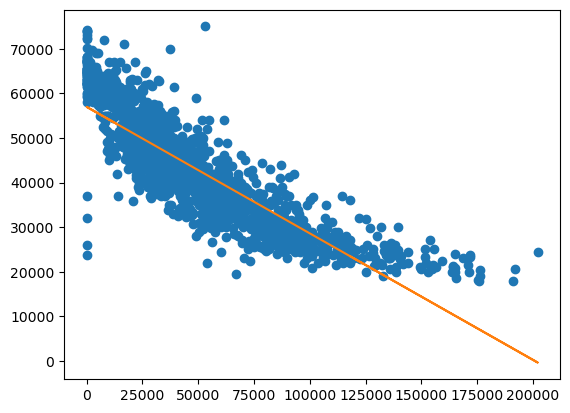

In [3]:
plt.plot(cars['Miles'], cars['Price'], 'o')
m, b = np.polyfit(cars['Miles'], cars['Price'], 1)
plt.plot(cars['Miles'], m*cars['Miles']+b)

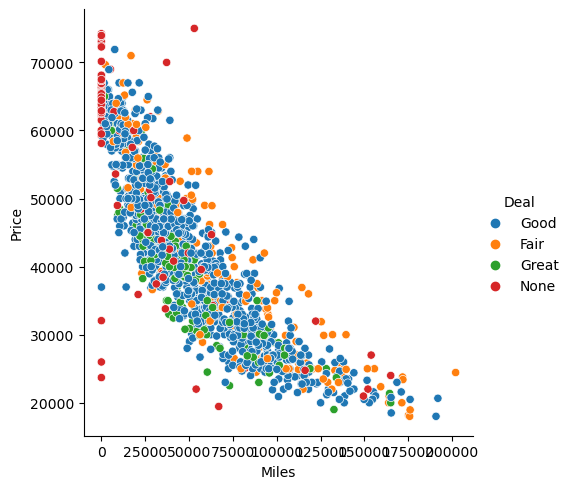

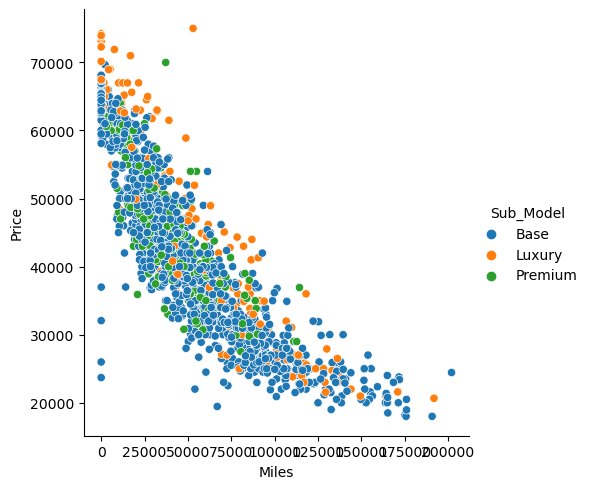

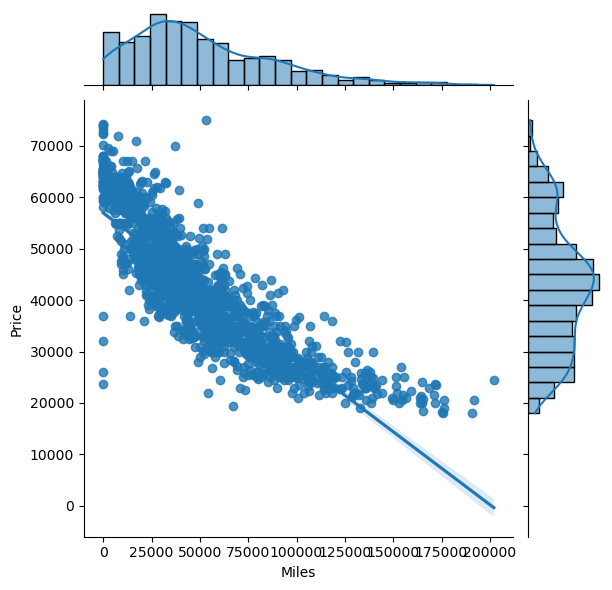

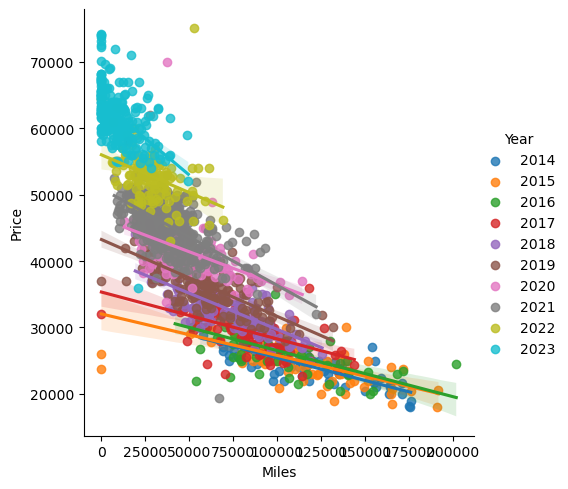

In [5]:
#create scatterplot with regression line and confidence interval lines
sns.relplot(data=cars, x='Miles', y='Price', hue="Deal")

sns.relplot(data=cars, x='Miles', y='Price', hue="Sub_Model")

sns.jointplot(data=cars, x='Miles', y='Price', kind="reg")

sns.lmplot( data=cars, x='Miles', y='Price', hue="Year")

In [6]:
x = np.array(cars['Miles']).reshape((-1, 1))
y = np.array(cars['Price'])

model = LinearRegression().fit(x, y)

print(f"R^2: {model.score(x, y)}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

R^2: 0.7344076095363414
intercept: 56968.57242893767
slope: [-0.28378407]
